## Preprocessing

In [1]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import shap
import matplotlib.pyplot as plt
import tqdm
from timeit import default_timer as timer

from sklearn import metrics
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

C:\Users\fre_f\anaconda3\envs\FF\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
prefix = 'c:/users/fre_f/PythonProjects/Bacteriological/Data/'
df = pd.read_csv(prefix+'DEDorNotSpecies.csv')

In [3]:
df.head()

,Index,Patient=1,None;Other;Other;Other;Other;Other;Other,k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanobrevibacter;s__smithii,k__Bacteria;p__Acidobacteria;c__Acidobacteria;o__NA;f__NA;g__Blastocatella;s__sp3006,k__Bacteria;p__Acidobacteria;c__Holophagae;o__NA;f__NA;g__NA;s__sp3737,k__Bacteria;p__Acidobacteria;c__Holophagae;o__NA;f__NA;g__NA;s__sp4001,k__Bacteria;p__Actinobacteria;c__Acidimicrobiia;o__Acidimicrobiales;f__Acidimicrobiaceae;g__NA;s__sp4262,k__Bacteria;p__Actinobacteria;c__Acidimicrobiia;o__Acidimicrobiales;f__Iamiaceae;g__Iamia;s__sp4310,k__Bacteria;p__Actinobacteria;c__Acidimicrobiia;o__Acidimicrobiales;f__Iamiaceae;g__Iamia;s__sp4312,...,k__Bacteria;p__Verrucomicrobia;c__Spartobacteria;o__Chthoniobacterales;f__NA;g__Terrimicrobium;s__sacchariphilum,k__Bacteria;p__Verrucomicrobia;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Verrucomicrobiaceae;g__Akkermansia;s__muciniphila,k__Bacteria;p__Verrucomicrobia;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Verrucomicrobiaceae;g__Haloferula;s__sp69345,k__Bacteria;p__Verrucomicrobia;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Verrucomicrobiaceae;g__Roseibacillus;s__sp69392,Gender F=1,Age,Lenses (Y_N),Antibiotics (B_A),OSDI score,DEQ5 score
0,P1,1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,1,65,0,0,NaN,NaN
1,P2,1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,1,67,0,0,31.25,17.0
2,P3,1,0.023263,0.714645,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.888039,0.0,0.0,1,33,0,0,33.30,16.0
3,P4,1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,1,66,0,0,93.75,21.0
4,P5,1,0.016438,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0,69,0,0,6.25,7.0


In [6]:
df.iloc[:,2:1340]

,None;Other;Other;Other;Other;Other;Other,k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanobrevibacter;s__smithii,k__Bacteria;p__Acidobacteria;c__Acidobacteria;o__NA;f__NA;g__Blastocatella;s__sp3006,k__Bacteria;p__Acidobacteria;c__Holophagae;o__NA;f__NA;g__NA;s__sp3737,k__Bacteria;p__Acidobacteria;c__Holophagae;o__NA;f__NA;g__NA;s__sp4001,k__Bacteria;p__Actinobacteria;c__Acidimicrobiia;o__Acidimicrobiales;f__Acidimicrobiaceae;g__NA;s__sp4262,k__Bacteria;p__Actinobacteria;c__Acidimicrobiia;o__Acidimicrobiales;f__Iamiaceae;g__Iamia;s__sp4310,k__Bacteria;p__Actinobacteria;c__Acidimicrobiia;o__Acidimicrobiales;f__Iamiaceae;g__Iamia;s__sp4312,k__Bacteria;p__Actinobacteria;c__Acidimicrobiia;o__Acidimicrobiales;f__Iamiaceae;g__Iamia;s__sp4316,k__Bacteria;p__Actinobacteria;c__Acidimicrobiia;o__Acidimicrobiales;f__NA;g__NA;s__sp4642,...,k__Bacteria;p__Tenericutes;c__Mollicutes;o__NA;f__NA;g__NA;s__sp67941,k__Bacteria;p__Thermotogae;c__Thermotogae;o__Thermotogales;f__Thermotogaceae;g__NA;s__sp68412,k__Bacteria;p__Verrucomicrobia;c__Opitutae;o__NA;f__NA;g__NA;s__sp68841,k__Bacteria;p__Verrucomicrobia;c__Opitutae;o__Opitutales;f__Opitutaceae;g__Opitutus;s__sp68878,k__Bacteria;p__Verrucomicrobia;c__Spartobacteria;o__Chthoniobacterales;f__Chthoniobacteraceae;g__Chthoniobacter;s__sp69092,k__Bacteria;p__Verrucomicrobia;c__Spartobacteria;o__Chthoniobacterales;f__Chthoniobacteraceae;g__Chthoniobacter;s__sp69093,k__Bacteria;p__Verrucomicrobia;c__Spartobacteria;o__Chthoniobacterales;f__NA;g__Terrimicrobium;s__sacchariphilum,k__Bacteria;p__Verrucomicrobia;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Verrucomicrobiaceae;g__Akkermansia;s__muciniphila,k__Bacteria;p__Verrucomicrobia;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Verrucomicrobiaceae;g__Haloferula;s__sp69345,k__Bacteria;p__Verrucomicrobia;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Verrucomicrobiaceae;g__Roseibacillus;s__sp69392
0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.023263,0.714645,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.888039,0.0,0.0
3,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.016438,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,0.012770,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
87,0.015267,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
88,0.039451,0.000000,0.0,0.0,0.0,0.044262,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
89,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [7]:
print(df.iloc[:,1])

0     1
1     1
2     1
3     1
4     1
     ..
86    0
87    0
88    0
89    0
90    0
Name: Patient=1, Length: 91, dtype: int64


In [8]:
X = df.iloc[:,2:1340]
y = df.iloc[:,1]

In [ ]:
#print(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(72, 1338)
(19, 1338)
(72,)
(19,)


In [11]:
def xgbmetrics():
    y_pred = clfxgb.predict(X_test)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="macro")
    cf = confusion_matrix(y_test, y_pred)
    target_names = ['1', '0']
    print(f"Balanced accuracy: {bal_acc}")
    print(f"MCC: {mcc}")
    print(f"F1: {f1}")
    print(f"Confusion matrix: \n{cf}")
    print(f"Classification report: \n{classification_report(y_test, y_pred, target_names=target_names)}")

In [12]:
def lgbmetrics():
    y_pred = clflgbm.predict(X_test)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="macro")
    cf = confusion_matrix(y_test, y_pred)
    target_names = ['1', '0']
    print(f"Balanced accuracy: {bal_acc}")
    print(f"MCC: {mcc}")
    print(f"F1: {f1}")
    print(f"Confusion matrix: \n{cf}")
    print(f"Classification report: \n{classification_report(y_test, y_pred, target_names=target_names)}")

## Train and predict

In [13]:
clfxgb = XGBClassifier().fit(X_train, y_train)
clfxgb.predict(X_test)

xgbmetrics()

Balanced accuracy: 0.5928571428571429
MCC: 0.18571428571428572
F1: 0.5928571428571429
Confusion matrix: 
[[ 2  3]
 [ 3 11]]
Classification report: 
              precision    recall  f1-score   support

           1       0.40      0.40      0.40         5
           0       0.79      0.79      0.79        14

    accuracy                           0.68        19
   macro avg       0.59      0.59      0.59        19
weighted avg       0.68      0.68      0.68        19



In [14]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
clflgbm = LGBMClassifier().fit(X_train, y_train)
clflgbm.predict(X_test)

lgbmetrics()

Balanced accuracy: 0.5571428571428572
MCC: 0.10826639239215334
F1: 0.5521885521885522
Confusion matrix: 
[[ 2  3]
 [ 4 10]]
Classification report: 
              precision    recall  f1-score   support

           1       0.33      0.40      0.36         5
           0       0.77      0.71      0.74        14

    accuracy                           0.63        19
   macro avg       0.55      0.56      0.55        19
weighted avg       0.65      0.63      0.64        19



## XAI

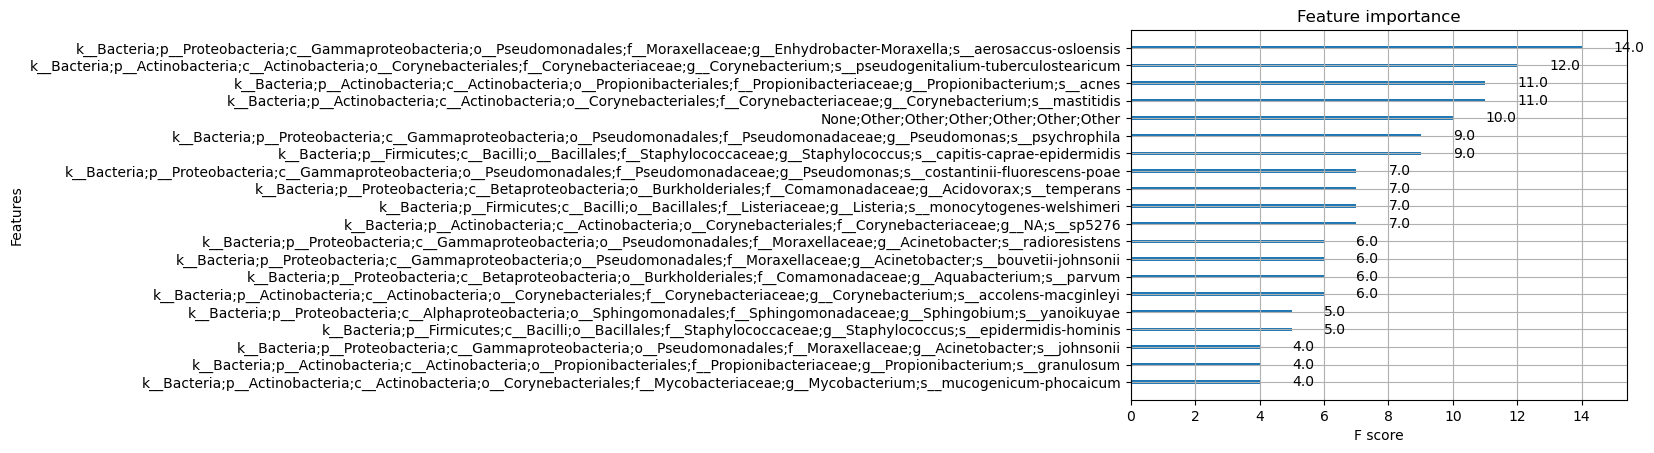

In [15]:
from xgboost import plot_importance
fig, ax = plt.subplots()
plot_importance(clfxgb, max_num_features = 20, ax=ax)
plt.title('Feature importance')

plt.show()

In [16]:
# Create a SHAP explainer for the XGBoost model
explainerxgb = shap.Explainer(clfxgb, X_test)

# Compute SHAP values for the dataset
shap_valuesxgb = explainerxgb(X_test)

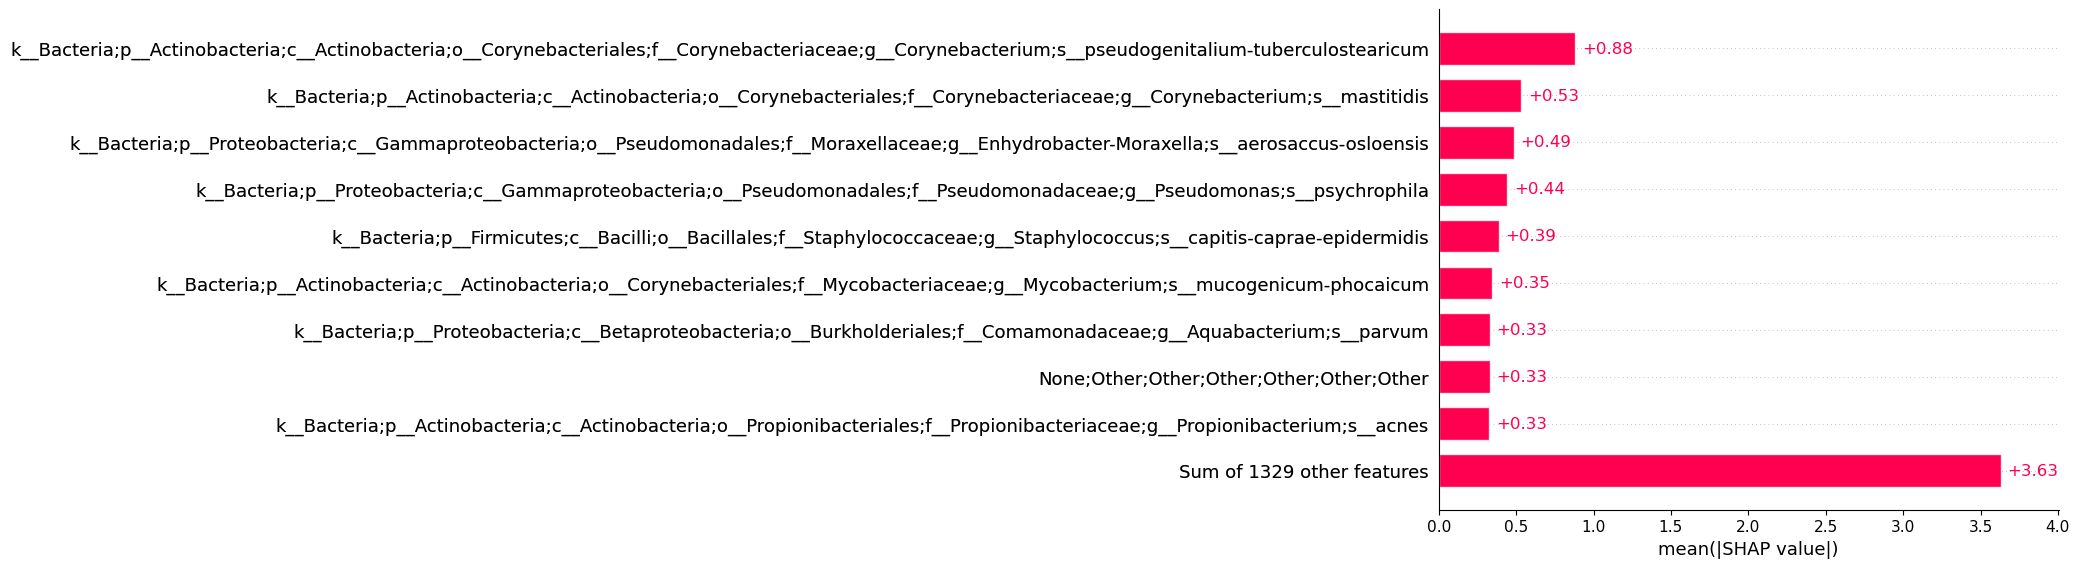

In [17]:
# Plot the SHAP summary plot

shap.plots.bar(shap_valuesxgb)

In [ ]:
# Plot the SHAP dependence plot for a specific feature
# Replace 'feature_name' with the name of the feature you want to visualize
feature_name = 'Bacteria;Cyanobacteria'  
shap.plots.scatter(shap_valuesxgb[:, feature_name], color=shap_valuesxgb)

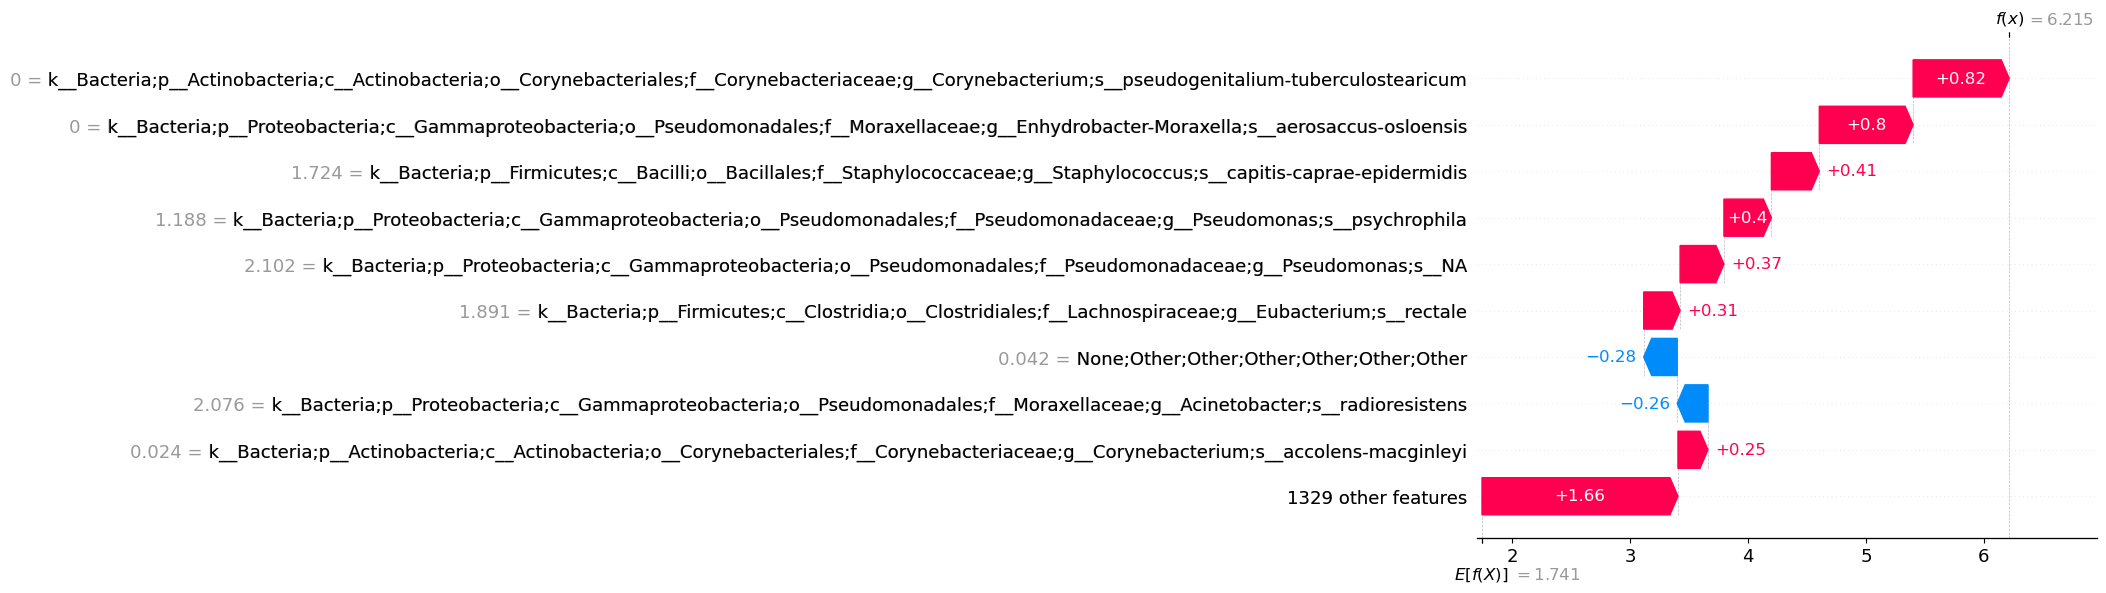

In [18]:
# Plot the SHAP decision plot for a specific instance
# Replace 'instance_index' with the index of the instance you want to visualize
instance_index = 0  # Example instance index
shap.plots.waterfall(shap_valuesxgb[instance_index])

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

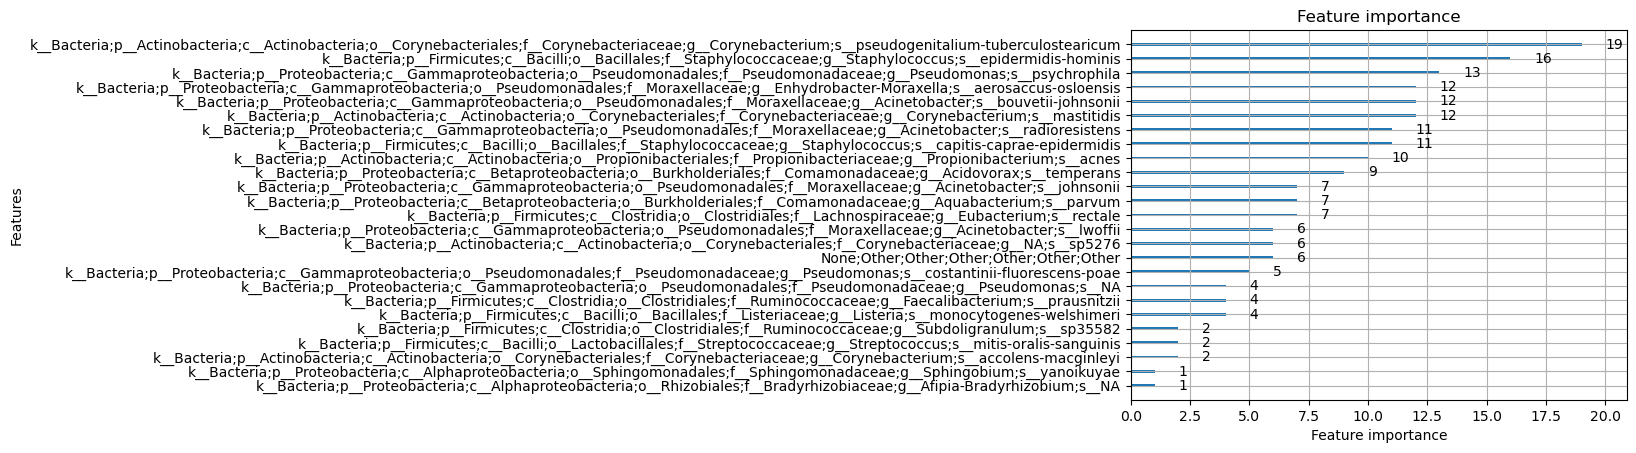

In [19]:
lgb.plot_importance(clflgbm)

In [20]:
# Create a SHAP explainer for the LightGBM model

explainer = shap.Explainer(clflgbm, X_test)

In [21]:
# Compute SHAP values for the dataset

shap_values = explainer(X_test)

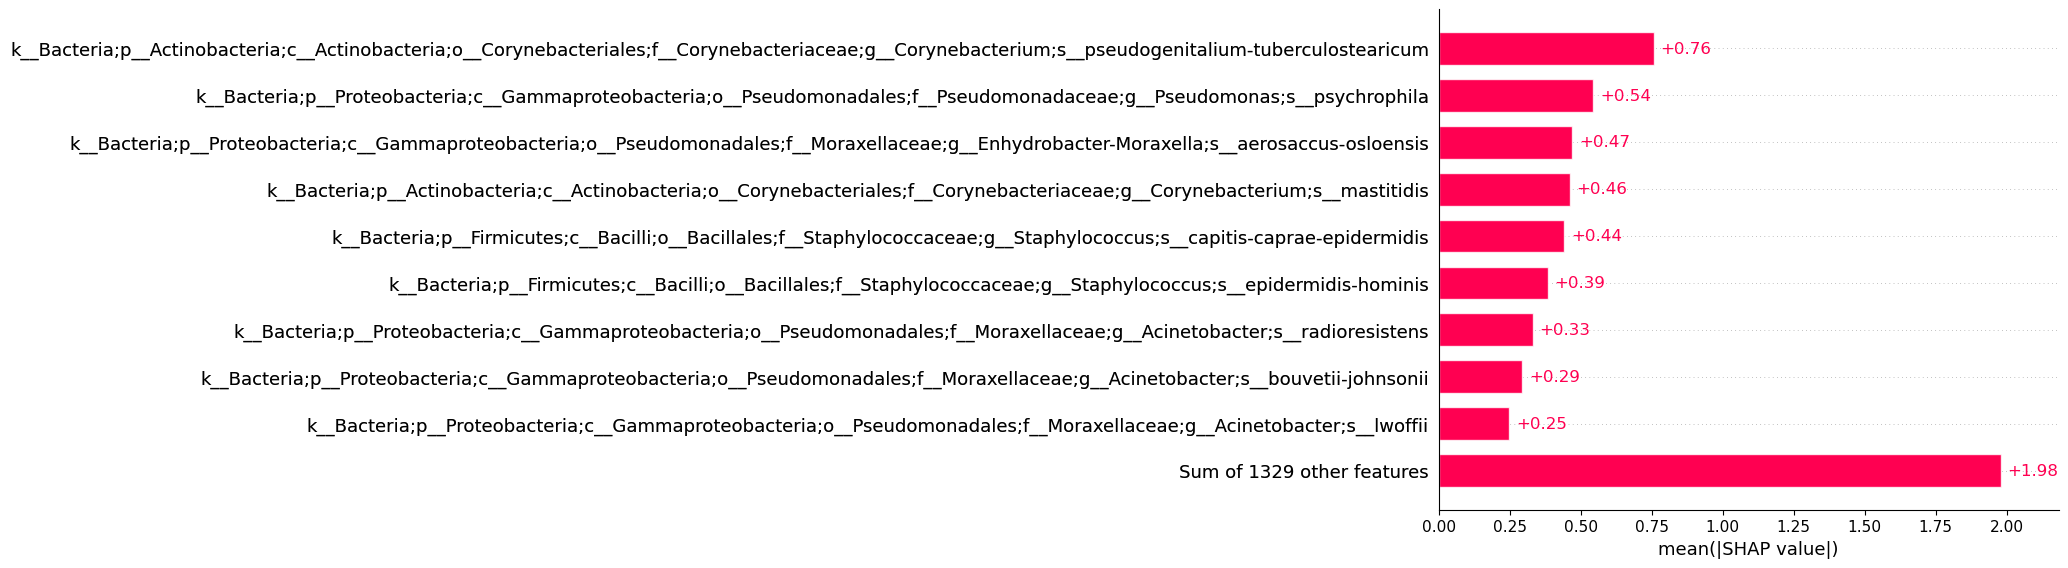

In [22]:
# Plot the SHAP summary plot

shap.plots.bar(shap_values)

In [ ]:
# Plot the SHAP dependence plot for a specific feature
# Replace 'feature_name' with the name of the feature you want to visualize
feature_name = 'Bacteria;Actinobacteria'  # Example feature name
shap.plots.scatter(shap_values[:, feature_name], color=shap_values)

In [ ]:
feature_name = 'Bacteria;Cyanobacteria'  
shap.plots.scatter(shap_values[:, feature_name], color=shap_values)

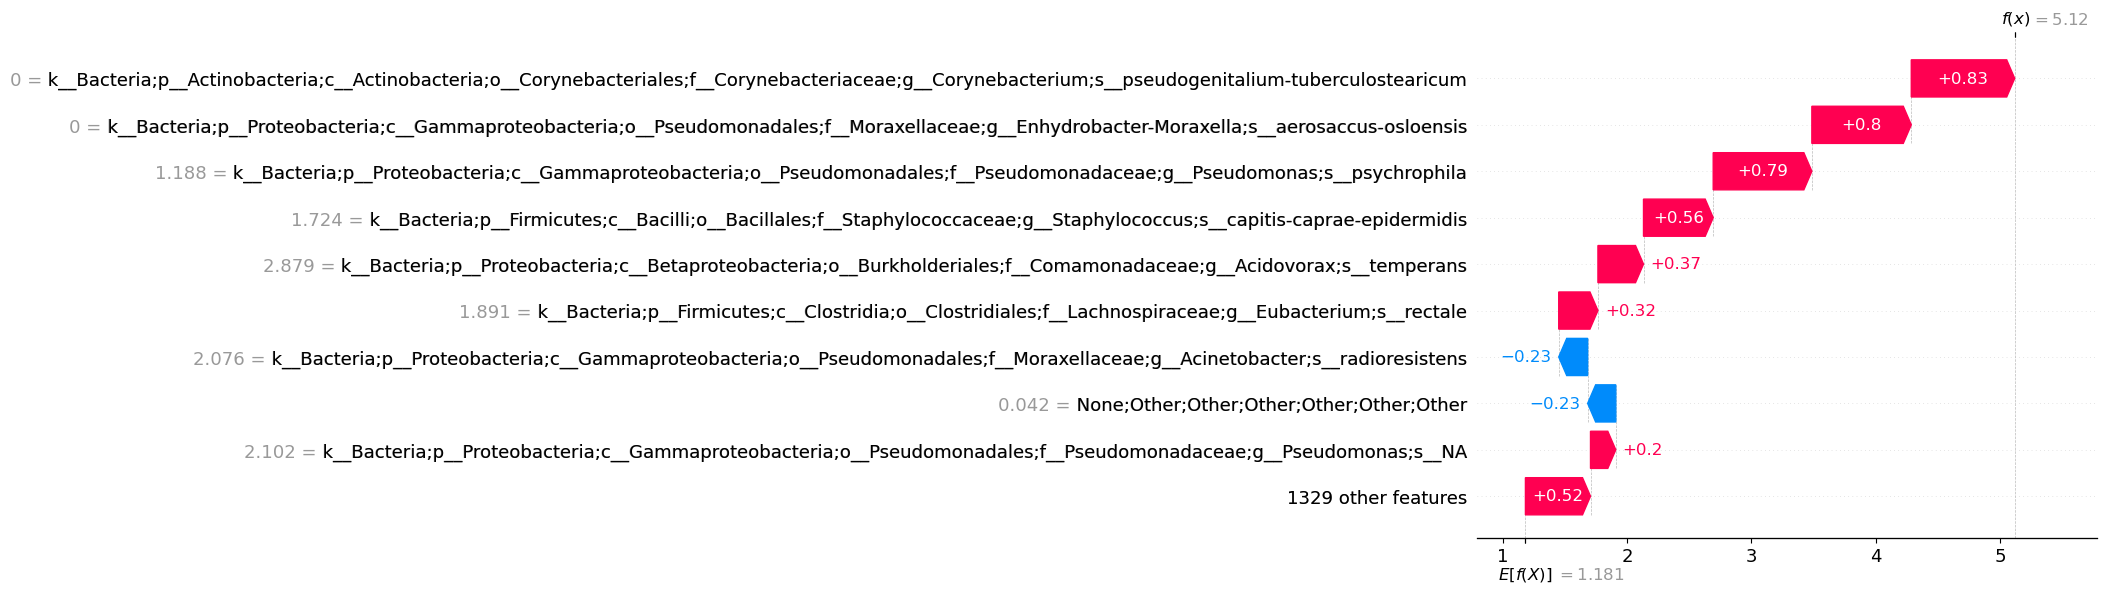

In [23]:
# Plot the SHAP decision plot for a specific instance
# Replace 'instance_index' with the index of the instance you want to visualize
instance_index = 0  # Example instance index
shap.plots.waterfall(shap_values[instance_index])